In [15]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv(r"C:\Users\Utente\Downloads\candidature_comuni_finanziate.csv")

In [17]:

df.head()

,codice_ipa,ente,tipologia_ente,comune,cod_comune,provincia,cod_provincia,regione,cod_regione,importo_finanziamento,avviso,data_invio_candidatura,data_finanziamento,codice_cup,numero_finestra_temporale,numero_di_protocollo,decreto_finanziamento,stato_candidatura,data_stato_candidatura
0,c_i942,Comune di Stazzema,Comuni,Stazzema,046030,LU,46,Toscana,9,3645.0,1.4.3 - app IO - Comuni - Aprile 2022,2022-05-20T10:45:26.000+0000,2022-08-12,H11F22001040006,2,24,Decreto n.24 - 2 / 2022 - PNRR,E,2024-07-31
1,c_e986,Comune di Martina Franca,Comuni,Martina Franca,073013,TA,73,Puglia,16,14000.0,1.4.4 Adozione SPID CIE - Comuni - Aprile 2022,2022-04-04T12:45:03.000+0000,2022-08-02,J91F22000120006,1,25,Decreto n.25 - 1 / 2022 - PNRR,R,2022-11-10
2,c_f592,Comune di Montepulciano,Comuni,Montepulciano,052015,SI,52,Toscana,9,8570.0,1.4.3 - pagoPA - Comuni - Aprile 2022,2022-04-22T14:31:29.000+0000,2022-07-13,B71F22000050006,1,23,Decreto n.23 - 1 / 2022 - PNRR,E,2023-11-21
3,c_e986,Comune di Martina Franca,Comuni,Martina Franca,073013,TA,73,Puglia,16,61914.0,1.4.3 - pagoPA - Comuni - Aprile 2022,2022-04-04T12:58:32.000+0000,2022-07-13,J91F22000130006,1,23,Decreto n.23 - 1 / 2022 - PNRR,R,2022-11-10
4,c_i643,Comune di Serra De' Conti,Comuni,Serra de' Conti,042046,AN,42,Marche,11,14000.0,1.4.4 Adozione SPID CIE - Comuni - Aprile 2022,2022-04-14T14:50:06.000+0000,2022-08-02,C21F22000070006,1,25,Decreto n.25 - 1 / 2022 - PNRR,R,2022-11-24


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61407 entries, 0 to 61406
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   codice_ipa                 61407 non-null  object 
 1   ente                       61407 non-null  object 
 2   tipologia_ente             61407 non-null  object 
 3   comune                     61401 non-null  object 
 4   cod_comune                 61407 non-null  object 
 5   provincia                  60546 non-null  object 
 6   cod_provincia              61407 non-null  int64  
 7   regione                    61407 non-null  object 
 8   cod_regione                61407 non-null  int64  
 9   importo_finanziamento      61407 non-null  float64
 10  avviso                     61407 non-null  object 
 11  data_invio_candidatura     61407 non-null  object 
 12  data_finanziamento         61407 non-null  object 
 13  codice_cup                 61406 non-null  obj

In [19]:
df["stato_candidatura"].unique()

array(['E', 'R', 'A'], dtype=object)

In [20]:
#raggruppo = df(['regione'].groupby('regione').sum("importo_finanziamento"))

raggruppo = df.groupby(['regione', 'provincia'])['importo_finanziamento'].sum()


In [21]:
raggruppo


regione     provincia
Abruzzo     AQ           29098543.8
            CH           31226647.2
            PE           16070282.8
            TE           16030110.0
Basilicata  MT           10793949.6
                            ...    
Veneto      RO           14009631.0
            TV           36083782.8
            VE           24217864.6
            VI           39331473.4
            VR           45896288.0
Name: importo_finanziamento, Length: 106, dtype: float64

In [22]:
raggruppo2 = df.groupby(['regione', 'provincia'])['comune'].count()

In [23]:
raggruppo2

regione     provincia
Abruzzo     AQ           1004
            CH            995
            PE            433
            TE            405
Basilicata  MT            250
                         ... 
Veneto      RO            447
            TV            747
            VE            350
            VI            900
            VR            793
Name: comune, Length: 106, dtype: int64

In [24]:
import seaborn as sns

In [25]:
raggruppo.to_clipboard()

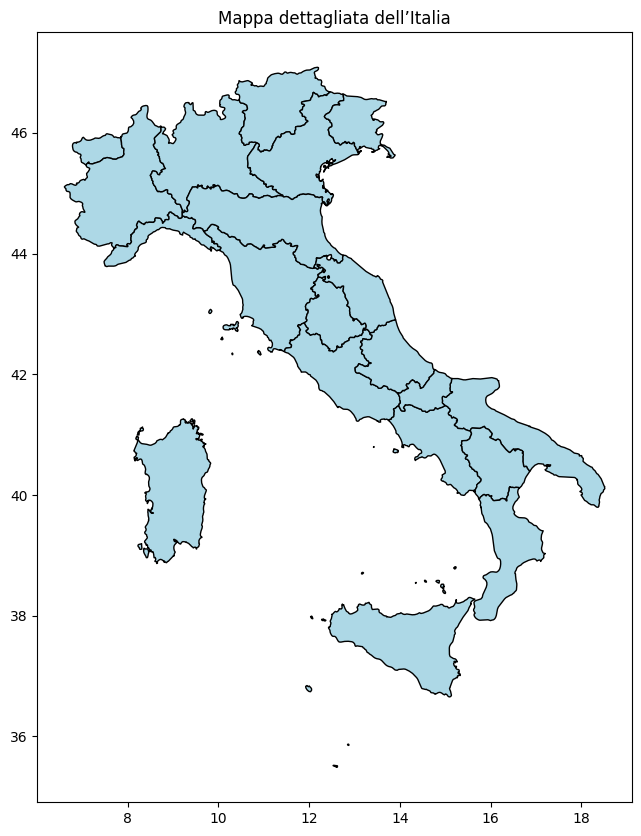

In [26]:
# Percorso del file Shapefile dell'Italia (cambia il percorso)
italy_shapefile_path = r"C:\Users\Utente\Downloads\it_shp\it.shp"

# Carica il dataset dell'Italia
italy = gpd.read_file(italy_shapefile_path)

# Creazione della mappa dell'Italia
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
italy.plot(ax=ax, color='lightblue', edgecolor='black')

# Titolo e mostra la mappa
plt.title('Mappa dettagliata dell’Italia')
plt.show()

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Percorso al file Shapefile delle regioni italiane
shapefile_path = r"C:\Users\Utente\Downloads\it_shp\it.shp"

# Carica il file shapefile con GeoPandas
italy = gpd.read_file(shapefile_path)

# Verifica i nomi delle colonne disponibili
#print(italy.columns)
#print(italy.head(20))
italy.head(20)


,id,name,source,geometry
0,IT23,Valle d'Aosta,https://simplemaps.com,"POLYGON ((7.84962 45.93971, 7.85593 45.91932, ..."
1,IT21,Piedmont,https://simplemaps.com,"POLYGON ((7.07537 45.46629, 7.08926 45.47706, ..."
2,IT42,Liguria,https://simplemaps.com,"POLYGON ((7.68793 44.0908, 7.70933 44.09152, 7..."
3,IT25,Lombardy,https://simplemaps.com,"POLYGON ((9.20143 44.68213, 9.20593 44.72083, ..."
4,IT32,Trentino-Alto Adige,https://simplemaps.com,"POLYGON ((10.8449 45.83405, 10.8267 45.84123, ..."
5,IT34,Veneto,https://simplemaps.com,"MULTIPOLYGON (((11.4215 44.94986, 11.41902 44...."
6,IT36,Friuli Venezia Giulia,https://simplemaps.com,"POLYGON ((13.09563 45.65232, 13.08073 45.66507..."
7,IT52,Tuscany,https://simplemaps.com,"MULTIPOLYGON (((10.02846 44.04926, 10.02853 44..."
8,IT55,Umbria,https://simplemaps.com,"MULTIPOLYGON (((11.88902 42.85039, 11.93166 42..."
9,IT62,Lazio,https://simplemaps.com,"MULTIPOLYGON (((11.4515 42.37437, 11.45158 42...."


In [34]:
mappa_regioni_italiano = {
    "Valle d'Aosta": "IT23", 
    "Piemonte": "IT21", 
    "Liguria": "IT42", 
    "Lombardia": "IT25", 
    "Trentino-Alto Adige": "IT32", 
    "Veneto": "IT34", 
    "Friuli Venezia Giulia": "IT36", 
    "Toscana": "IT52", 
    "Umbria": "IT55", 
    "Lazio": "IT62", 
    "Abruzzo": "IT65", 
    "Puglia": "IT75", 
    "Campania": "IT72", 
    "Molise": "IT67", 
    "Basilicata": "IT77", 
    "Calabria": "IT78", 
    "Sicilia": "IT82", 
    "Sardegna": "IT88", 
    "Emilia-Romagna": "IT45", 
    "Marche": "IT57"
}



In [35]:
# Aggiungere la colonna "Regione" con i nomi delle regioni italiane
df["regione44"] = df["regione"].map(mappa_regioni_italiano)


In [37]:
df.head(5)

,codice_ipa,ente,tipologia_ente,comune,cod_comune,provincia,cod_provincia,regione,cod_regione,importo_finanziamento,avviso,data_invio_candidatura,data_finanziamento,codice_cup,numero_finestra_temporale,numero_di_protocollo,decreto_finanziamento,stato_candidatura,data_stato_candidatura,regione44
0,c_i942,Comune di Stazzema,Comuni,Stazzema,046030,LU,46,Toscana,9,3645.0,1.4.3 - app IO - Comuni - Aprile 2022,2022-05-20T10:45:26.000+0000,2022-08-12,H11F22001040006,2,24,Decreto n.24 - 2 / 2022 - PNRR,E,2024-07-31,IT52
1,c_e986,Comune di Martina Franca,Comuni,Martina Franca,073013,TA,73,Puglia,16,14000.0,1.4.4 Adozione SPID CIE - Comuni - Aprile 2022,2022-04-04T12:45:03.000+0000,2022-08-02,J91F22000120006,1,25,Decreto n.25 - 1 / 2022 - PNRR,R,2022-11-10,IT75
2,c_f592,Comune di Montepulciano,Comuni,Montepulciano,052015,SI,52,Toscana,9,8570.0,1.4.3 - pagoPA - Comuni - Aprile 2022,2022-04-22T14:31:29.000+0000,2022-07-13,B71F22000050006,1,23,Decreto n.23 - 1 / 2022 - PNRR,E,2023-11-21,IT52
3,c_e986,Comune di Martina Franca,Comuni,Martina Franca,073013,TA,73,Puglia,16,61914.0,1.4.3 - pagoPA - Comuni - Aprile 2022,2022-04-04T12:58:32.000+0000,2022-07-13,J91F22000130006,1,23,Decreto n.23 - 1 / 2022 - PNRR,R,2022-11-10,IT75
4,c_i643,Comune di Serra De' Conti,Comuni,Serra de' Conti,042046,AN,42,Marche,11,14000.0,1.4.4 Adozione SPID CIE - Comuni - Aprile 2022,2022-04-14T14:50:06.000+0000,2022-08-02,C21F22000070006,1,25,Decreto n.25 - 1 / 2022 - PNRR,R,2022-11-24,IT57


In [46]:
finanziamenti_per_regione = df.groupby('regione44')['importo_finanziamento'].sum().reset_index()
print(finanziamenti_per_regione)

   regione44  importo_finanziamento
0       IT21            256942189.4
1       IT25            434087609.4
2       IT34            212807193.4
3       IT42             64127325.2
4       IT45            138592471.6
5       IT52            118238422.4
6       IT55             32211620.2
7       IT57             61681246.6
8       IT62            142544140.0
9       IT65             92425583.8
10      IT67             33985640.6
11      IT72            226526416.2
12      IT75            137370352.8
13      IT77             39784402.6
14      IT78            125450594.0
15      IT82            184121481.2
16      IT88             92131216.2


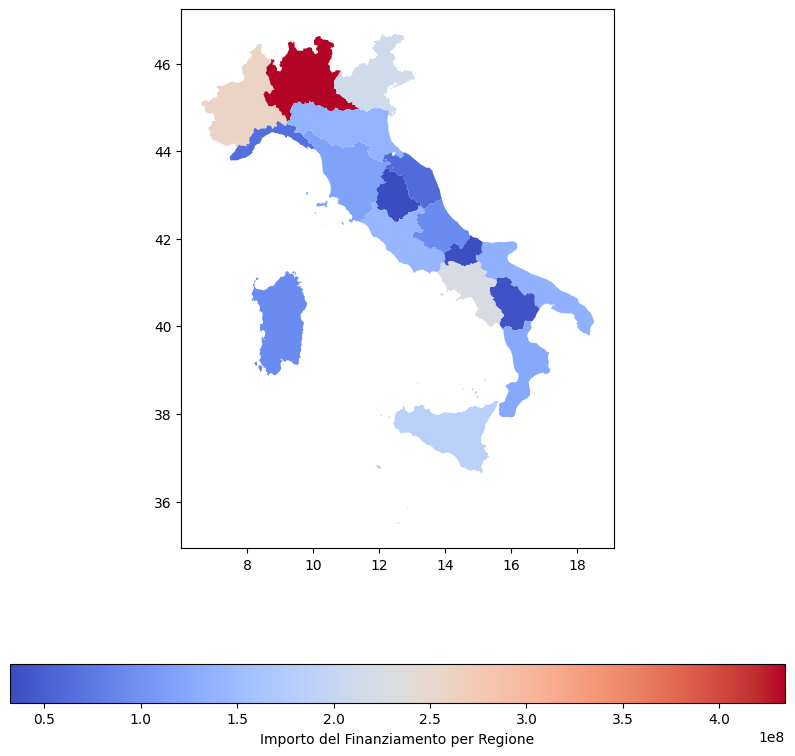

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Caricare il file geojson delle regioni italiane
mappa_italia = gpd.read_file(r'C:\Users\Utente\Downloads\it_shp\it.shp')

# Unire i dati dei finanziamenti con i dati geografici delle regioni
mappa_italia = mappa_italia.merge(finanziamenti_per_regione, left_on='id', right_on='regione44', how='inner')

# Creare la heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mappa_italia.plot(column='importo_finanziamento', ax=ax, legend=True,
                  legend_kwds={'label': "Importo del Finanziamento per Regione",
                               'orientation': "horizontal"},
                  cmap='coolwarm')

# Mostrare la mappa
plt.show()
